In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
student = pd.read_csv('/content/Students_Performance.csv')

In [ ]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [ ]:
student.shape

(1000, 8)

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
student.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
student.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
student['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

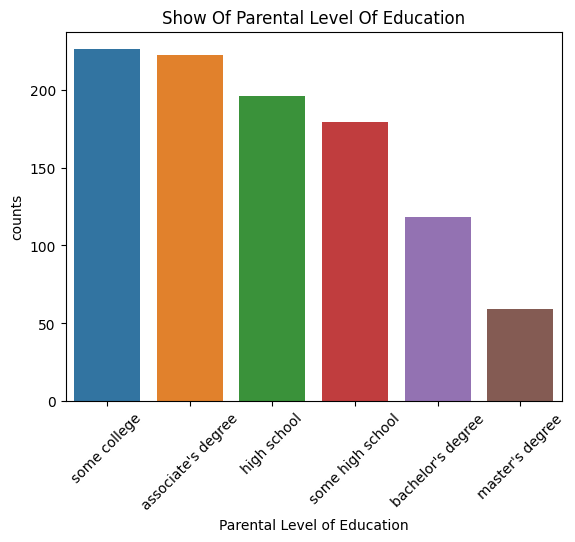

In [ ]:
sns.barplot(x=student['parental level of education'].value_counts().index,y=student['parental level of education'].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel('Parental Level of Education')
plt.ylabel('counts')
plt.title('Show Of Parental Level Of Education')
plt.show()

Above graph shows Highest proportion of parentel level of Education is 'Some college', 'associate's degreee' and 'high school'

In [ ]:
student['total_score']=(student['math score']+student['reading score']+student['writing score'])
student['average']=student['total_score']/3

In [ ]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,55,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
3,female,group B,some college,standard,none,11,38,32,81,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,94,31.333333


Text(0.5, 1.0, 'Average Score Distribution')

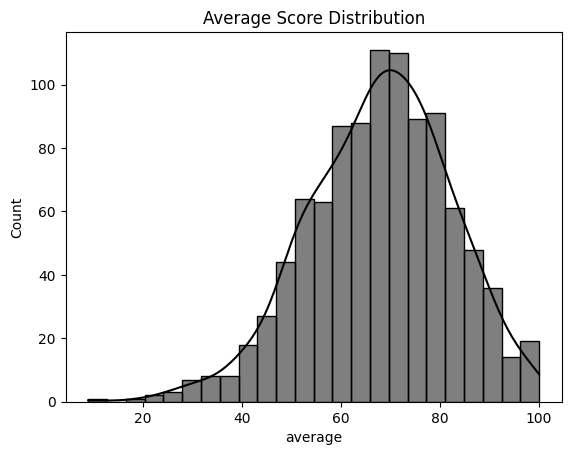

In [ ]:
## Average score distribution
%matplotlib inline
sns.histplot(data=student,x='average',kde=True,color='k')
plt.title('Average Score Distribution')


**From above 70% scores between 50 and 100 and 30% scores rest**

In [ ]:
genderavg=student.groupby('gender').mean()
genderavg

<ipython-input-76-97611173b253>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genderavg=student.groupby('gender').mean()


,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.376448,72.590734,72.467181,208.434363,69.478121
male,68.821577,65.545643,63.446058,197.813278,65.937759


<Axes: xlabel='average', ylabel='Count'>

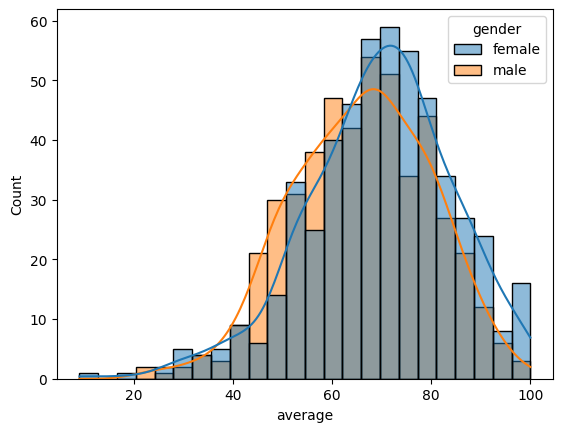

In [ ]:
 ## avgerage scores based on Gender
sns.histplot(data=student,x='average',kde=True,hue='gender')

<Axes: xlabel='gender'>

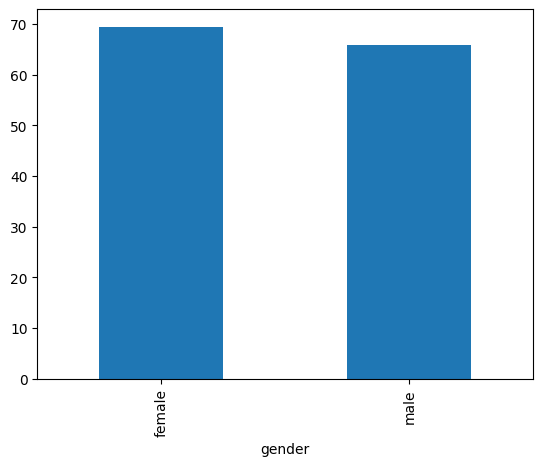

In [ ]:
# or another way
student.groupby('gender')['average'].mean().plot.bar()

Approximately 70 is female average score and 65 is males average score there for Female students perform well than male students

<Axes: xlabel='average', ylabel='Count'>

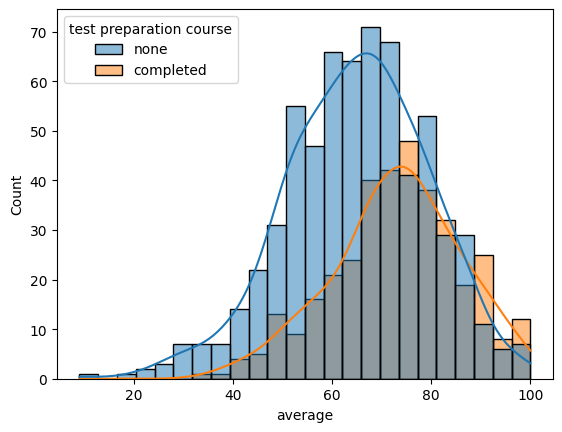

In [ ]:
## avgerage score based on test preparation course
sns.histplot(data=student,x='average',kde=True,hue='test preparation course')

<Axes: xlabel='test preparation course'>

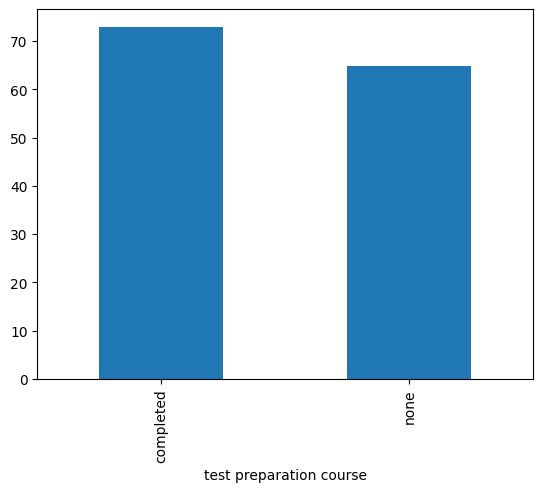

In [ ]:
# Or another way
student.groupby('test preparation course')['average'].mean().plot.bar()

Most of the students have not completed the test preparation course

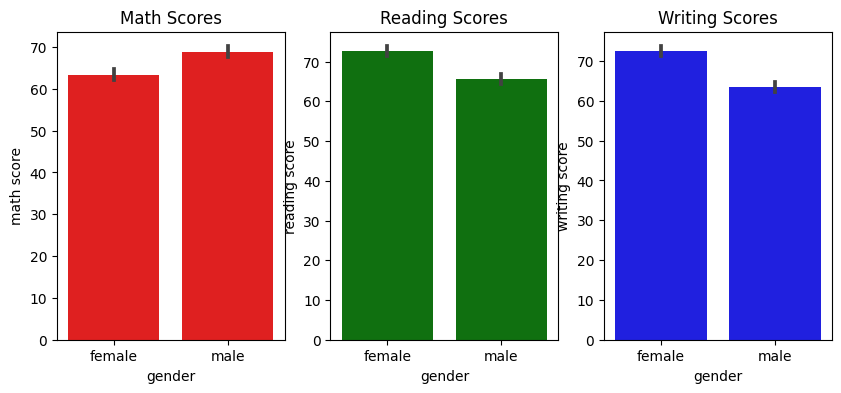

In [ ]:
##The scores of male and female students in each subjects
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=student,color='r')
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=student,color='g')
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=student,color='b')
plt.show()

From this we can see that male students scored higher in Maths where as female students scored higher in Reading and writing

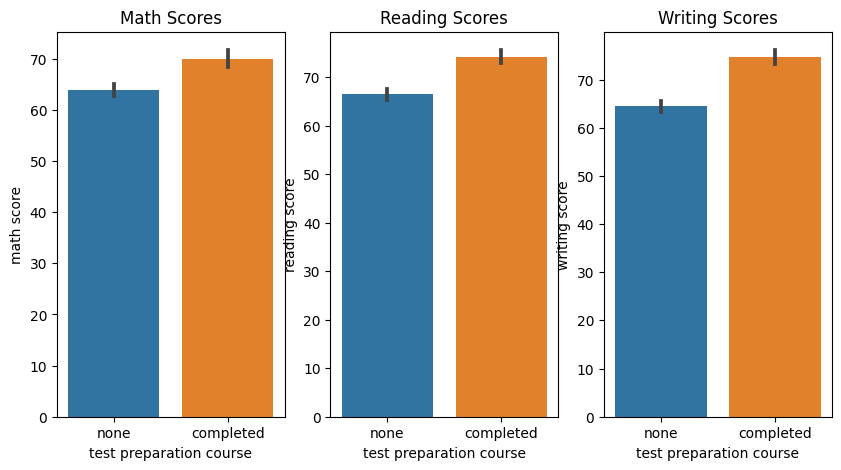

In [ ]:
## The scores who completed Test preperation course
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.barplot( y="math score", x="test preparation course", data=student)
plt.subplot(1,3,2)
plt.title('Reading Scores')
sns.barplot( y="reading score", x="test preparation course", data=student)
plt.subplot(1,3,3)
plt.title('Writing Scores')
sns.barplot( y="writing score", x="test preparation course", data=student)
plt.show()

The students who completed the test preparation course scored higher in all three subjects.

In [27]:
## st=student.sort_values(by=['math score'],ascending=False)

25% of students who scored the highest in maths


In [9]:
student['bonus']=0

In [10]:
top_score=student.nlargest(250,['math score'])

In [11]:
top_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus
515,female,group E,some college,standard,none,100,92,97,0
516,female,group E,bachelor's degree,standard,none,100,100,100,0
517,female,group E,associate's degree,standard,none,100,100,100,0
996,male,group A,some college,standard,completed,100,96,86,0
997,male,group D,some college,standard,completed,100,97,99,0
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,0
429,female,group E,some high school,standard,none,77,79,80,0
849,male,group A,bachelor's degree,standard,none,77,67,68,0
850,male,group C,associate's degree,free/reduced,none,77,67,64,0


In [12]:
tpmin=min(top_score['math score'])

In [13]:
tpmin

77

In [18]:
student['bonus']=student['math score'].apply(lambda x:1 if x>=tpmin else 0)

In [19]:
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus
0,female,group C,some high school,free/reduced,none,0,17,10,0
1,female,group B,high school,free/reduced,none,8,24,23,0
2,female,group B,some high school,free/reduced,none,18,32,28,0
3,female,group B,some college,standard,none,11,38,32,0
4,female,group C,some college,free/reduced,none,22,39,33,0
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,1
996,male,group A,some college,standard,completed,100,96,86,1
997,male,group D,some college,standard,completed,100,97,99,1
998,male,group E,associate's degree,free/reduced,completed,100,100,93,1


from the question to give bonus points to the top 25% of students based on their math score.here bonus 1 was given to top 25% students based on their math score and bonus 0 to rest.